In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## 1. Linear regression on Linear data with Scikit-learn

In [2]:
# set seed
np.random.seed(0)

# generate data
X_lin_sk = np.random.rand(100, 1)
y_lin_sk = 4 + 5 * X_lin_sk + 2 * np.random.rand(100, 1)

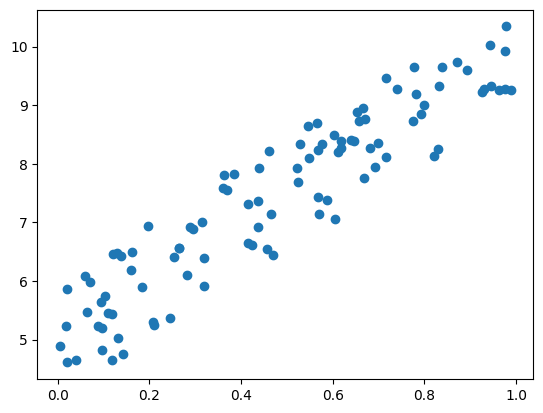

In [3]:
# visualilze data
plt.scatter(X_lin_sk, y_lin_sk)
plt.show()

In [4]:
reg = LinearRegression()
reg.fit(X_lin_sk, y_lin_sk)

LinearRegression()

In [5]:
X_vals_sk = np.linspace(0, 1, 100).reshape(-1, 1)
y_vals_sk = reg.predict(X_vals_sk)

X_test_sk = np.array([0.5]).reshape(-1, 1)
y_test_sk = reg.predict(X_test_sk)

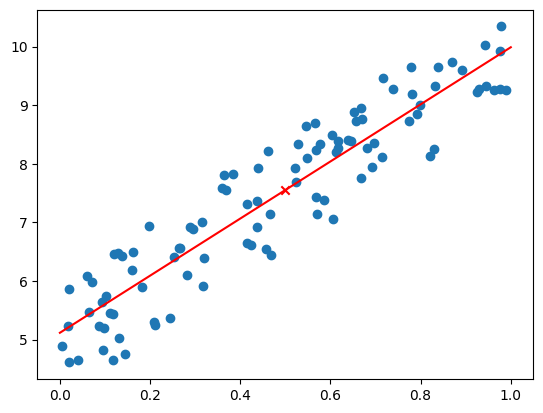

In [6]:
plt.scatter(X_lin_sk, y_lin_sk)
plt.scatter(X_test_sk, y_test_sk, color='red', marker='x')
plt.plot(X_vals_sk, y_vals_sk, color='red')

## 2. Polynomial Regression

## 2.1 Linear Hypothesis on Polynomial like data

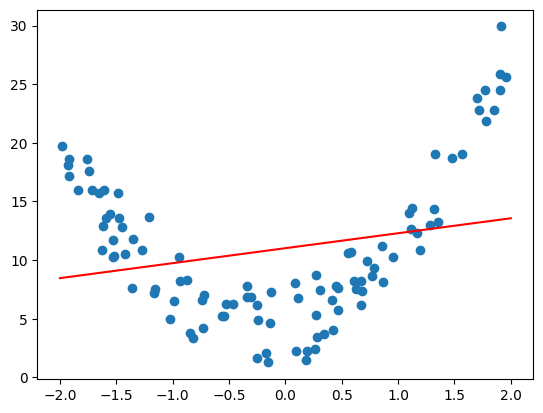

In [7]:
np.random.seed(0)

X_pol = 4 * np.random.rand(100, 1) - 2
# X_pol = np.random.rand(100, 1)
y_pol = 4 + 2 * X_pol + 5 * X_pol ** 2 + 2 * np.random.randn(100, 1)

reg_pol_lin = LinearRegression()
reg_pol_lin.fit(X_pol, y_pol)

X_vals_pol_lin = np.linspace(-2, 2, 100).reshape(-1, 1)
y_vals_pol_lin = reg_pol_lin.predict(X_vals_pol_lin)

plt.scatter(X_pol, y_pol)
plt.plot(X_vals_pol_lin, y_vals_pol_lin, color='red')

## 2.1 Polynomial kernel trick 

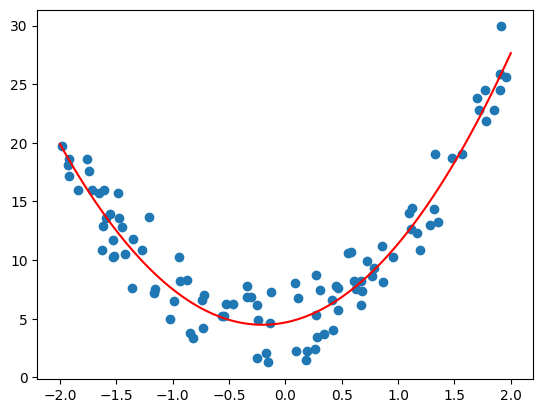

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False) # 2nd degree polynomial # ax^2 + bx + c
X_pol_kernel = poly_features.fit_transform(X_pol) # [x] -> [x, x^2]

reg_pol_pol = LinearRegression()
reg_pol_pol.fit(X_pol_kernel, y_pol)

X_vals_pol = np.linspace(-2, 2, 100).reshape(-1, 1)
X_vals_pol_kernel = poly_features.transform(X_vals_pol)
y_vals_pol = reg_pol_pol.predict(X_vals_pol_kernel)

plt.scatter(X_pol, y_pol)
plt.plot(X_vals_pol, y_vals_pol, color='red')
plt.show()

In [9]:
print(f"X_pol.shape: {X_pol.shape}")
print(f"X_pol_kernel.shape: {X_pol_kernel.shape}")

X_pol.shape: (100, 1)
X_pol_kernel.shape: (100, 2)


In [10]:
print(f"X_pol[0]: {X_pol[0]}")
print(f"X_pol_kernel[0]: {X_pol_kernel[0]}")
print(X_pol[0][0] ** 2)
print(X_pol_kernel[0][1])

X_pol[0]: [0.19525402]
X_pol_kernel[0]: [0.19525402 0.03812413]
0.038124130650607185
0.038124130650607185


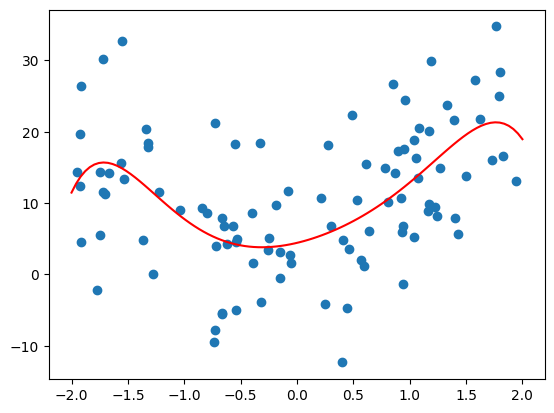

In [29]:
np.random.seed(11)
X_pol = 4 * np.random.rand(100, 1) - 2
y_pol = 4 + 2 * X_pol + 5 * X_pol ** 2 + 9 * np.random.randn(100, 1)

poly_features6 = PolynomialFeatures(degree=6, include_bias=False) # 2nd degree polynomial # ax^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx + g
X_pol_kernel6 = poly_features6.fit_transform(X_pol) # [x] -> [x, x^2]

reg_pol_pol6 = LinearRegression()
reg_pol_pol6.fit(X_pol_kernel6, y_pol)

X_vals_pol = np.linspace(-2, 2, 100).reshape(-1, 1)
X_vals_pol_kernel6 = poly_features6.transform(X_vals_pol)
y_vals_pol6 = reg_pol_pol6.predict(X_vals_pol_kernel6)

plt.scatter(X_pol, y_pol)
plt.plot(X_vals_pol, y_vals_pol6, color='red')
plt.show()

Poly kernel trick is a way to transform the data into a higher dimension space where the data is linearly separable.  
  
**Polynomial regression** is also **linear regression**, but the input data is transformed into a higher dimension space.
$$\begin{bmatrix}{x_1}^2&x_1&1\\{x_2}^2&x_2&1\\ &\vdots& \end{bmatrix} \begin{bmatrix} a\\b\\c\\ \end{bmatrix}$$

## reference
Gradient decent:  
https://velog.io/@tjswodud/딥러닝-Gradient-Descent-Newton-Method